In [1]:
import gbspy as g
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import glob


import multiprocessing as mp
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import matplotlib.lines as mlines
from matplotlib.ticker import AutoMinorLocator

#import sys  
#sys.path.insert(0, '/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy')

# Get the current working directory|
cwd = os.getcwd()

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [39]:
# IEEE journals typically require figures to be very clear at a column width of around 3.5 to 4 inches
fig_width = 3.5  # in inches
fig_height =  fig_width / 1.618
plt.rcParams.update({
    # Figure size and DPI
    'figure.figsize': (fig_width, fig_width / 1.618),  # IEEE column width, golden ratio height
    'figure.dpi': 300,                     # Figure resolution
    'savefig.dpi': 300,                    # Save figure resolution
    'savefig.format': 'pdf',               # Preferred format for vector graphics

    # Font settings
    'font.size': 12,                       # Main font size
    #'font.family': 'Sans-serif',           # Font family
    #'font.sans-serif': ['Arial', 'Helvetica'],  # Font type

    # Axes settings
    'axes.labelsize': 12,                  # Font size of the x and y labels
    'axes.titlesize': 12,                  # Font size of the title
    'axes.linewidth': 1,                   # Edge line width

    # Tick settings
    'xtick.labelsize': 12,                  # Font size of the x tick labels
    'ytick.labelsize': 12,                  # Font size of the y tick labels
    'xtick.major.size': 4,                 # Length of major tick marks
    'xtick.minor.size': 2,                 # Length of minor tick marks
    'xtick.major.width': 1,                # Width of major tick marks
    'xtick.minor.width': 0.5,              # Width of minor tick marks
    'ytick.major.size': 4,                 # Length of major tick marks
    'ytick.minor.size': 2,                 # Length of minor tick marks
    'ytick.major.width': 1,                # Width of major tick marks
    'ytick.minor.width': 0.5,              # Width of minor tick marks

    # Legend settings
    'legend.fontsize': 12,                  # Font size of the legend
    'legend.frameon': True,               # Disable background frame
    'legend.edgecolor':'white',

    # Line settings
    'lines.linewidth': 1.5,                # Line width
    'lines.markersize': 4,                 # Marker size
    'lines.markeredgewidth' : 0.8,
    'lines.markeredgecolor' : 'black',
    # Grid settings
    'grid.alpha': 0.5,                     # Grid line transparency
    'grid.linestyle': ':',                 # Grid line style
    
    # Scatter settings
    'scatter.edgecolors': None,
    
    # Marker
    'lines.markeredgewidth' : 5,
    'lines.markeredgecolor' : 'black'

})

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Data load NT </b></span><br>
</div>

In [45]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_dn0p6')
s=g.Sim()

t2 = s.time[-1]
t1 = t2-5

Psi_DNT = s.Psi; ixxpt_DNT = s.ixxpt; iyxpt_DNT = s.iyxpt

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

Psi_DNT = s.Psi; ixxpt_DNT = s.ixxpt; iyxpt_DNT = s.iyxpt

# Load field
dens  = s.get_field('n',     z1=z1, z2=z2, t1=t1, t2=t2)
Te    = s.get_field('Te', z1=z1, z2=z2, t1=t1, t2=t2)
phi    = s.get_field('strmf', z1=z1, z2=z2, t1=t1, t2=t2)
pe    = dens * Te

# Average in time and toroidal direction
dens_DNT_avg  = np.mean(dens, axis=(2,3)); dens_avg_tor = np.mean(dens, axis=2)
pe_DNT_avg  = np.mean(pe, axis=(2,3)); pe_avg_tor = np.mean(pe, axis=2)
Te_DNT_avg    = np.mean(Te, axis=(2,3)); Te_avg_tor = np.mean(Te, axis=2)
phi_DNT_avg    = np.mean(phi, axis=(2,3)); phi_avg_tor = np.mean(phi, axis=2)

dens_DNT_fluct   = np.sqrt((dens[:,:,0,:]-dens_avg_tor)**2) / dens_avg_tor
dens_DNT_fluct_avg = np.mean(dens_DNT_fluct, axis=2)

pe_DNT_fluct   = np.sqrt((pe[:,:,0,:]-pe_avg_tor)**2) / pe_avg_tor
pe_DNT_fluct_avg = np.mean(pe_DNT_fluct, axis=2)

Te_DNT_fluct   = np.sqrt((Te[:,:,0,:]-Te_avg_tor)**2) / Te_avg_tor
Te_DNT_fluct_avg = np.mean(Te_DNT_fluct, axis=2)

phi_DNT_fluct   = np.sqrt((phi[:,:,0,:]-phi_avg_tor)**2) / phi_avg_tor
phi_DNT_fluct_avg = np.mean(phi_DNT_fluct, axis=2)

phi_DNT_fluct = phi[:,:,0,-1]

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Data load NT without BM </b></span><br>

</div>

In [46]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_no_curv')
s=g.Sim()

t2 = s.time[-1]
t1 = t2-5

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

# Load field
dens_no_curv  = s.get_field('n',     z1=z1, z2=z2, t1=t1, t2=t2)
Te_no_curv    = s.get_field('Te', z1=z1, z2=z2, t1=t1, t2=t2)
phi_no_curv    = s.get_field('strmf', z1=z1, z2=z2, t1=t1, t2=t2)
pe_no_curv    = dens_no_curv * Te_no_curv

# Average in time and toroidal direction
dens_DNT_avg_no_curv  = np.mean(dens_no_curv, axis=(2,3)); dens_avg_tor_no_curv = np.mean(dens_no_curv, axis=2)
pe_DNT_avg_no_curv  = np.mean(pe_no_curv, axis=(2,3)); pe_avg_tor_no_curv = np.mean(pe_no_curv, axis=2)
Te_DNT_avg_no_curv    = np.mean(Te_no_curv, axis=(2,3)); Te_avg_tor_no_curv = np.mean(Te_no_curv, axis=2)
phi_DNT_avg_no_curv    = np.mean(phi_no_curv, axis=(2,3)); phi_avg_tor_no_curv = np.mean(phi_no_curv, axis=2)

dens_DNT_fluct_no_curv   = np.sqrt((dens_no_curv[:,:,0,:]-dens_avg_tor_no_curv)**2) / dens_avg_tor_no_curv
dens_DNT_fluct_avg_no_curv = np.mean(dens_DNT_fluct_no_curv, axis=2)

pe_DNT_fluct_no_curv   = np.sqrt((pe_no_curv[:,:,0,:]-pe_avg_tor_no_curv)**2) / pe_avg_tor_no_curv
pe_DNT_fluct_avg_no_curv = np.mean(pe_DNT_fluct_no_curv, axis=2)

Te_DNT_fluct_no_curv   = np.sqrt((Te_no_curv[:,:,0,:]-Te_avg_tor_no_curv)**2) / Te_avg_tor_no_curv
Te_DNT_fluct_avg_no_curv = np.mean(Te_DNT_fluct_no_curv, axis=2)

phi_DNT_fluct_no_curv   = np.sqrt((phi_no_curv[:,:,0,:]-phi_avg_tor_no_curv)**2) / phi_avg_tor_no_curv
phi_DNT_fluct_avg_no_curv = np.mean(phi_DNT_fluct_no_curv, axis=2)

phi_DNT_fluct_no_curv = phi_no_curv[:,:,0,-1]

/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy/pp.py:65: FutureWarning: An error has occured when reading the result index from the HDF5 contents:

Traceback (most recent call last):
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/gbs_python/gbspy/pp.py", line 58, in _read_file_index_from_result
    with h5py.File(path, "r") as f:
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/h5py/_hl/files.py", line 533, in __init__
    fid = make_fid(name, mode, userblock_size, fapl, fcpl, swmr=swmr)
  File "/marconi/home/userexternal/klim0000/miniconda3/lib/python3.9/site-packages/h5py/_hl/files.py", line 226, in make_fid
    fid = h5f.open(name, flags, fapl=fapl)
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "h5py/h5f.pyx", line 106, in h5py.h5f.open
OSError: Unable to open file (

An error occured when opening /marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DNT_no_curv/results_138.h5:
Unable to open file (file signature not found)
Trying to skip the file...
Last results file skipped


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Data load PT </b></span><br>
</div>

In [47]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_d0p6')
s=g.Sim()

t2 = s.time[-1]
t1 = t2-5

Psi_DPT = s.Psi; ixxpt_DPT = s.ixxpt; iyxpt_DPT = s.iyxpt

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

Psi_DPT = s.Psi; ixxpt_DPT = s.ixxpt; iyxpt_DPT = s.iyxpt

# Load field
dens  = s.get_field('n',     z1=z1, z2=z2, t1=t1, t2=t2)
Te    = s.get_field('Te', z1=z1, z2=z2, t1=t1, t2=t2)
phi    = s.get_field('strmf', z1=z1, z2=z2, t1=t1, t2=t2)
pe    = dens * Te

# Average in time and toroidal direction
dens_DPT_avg  = np.mean(dens, axis=(2,3)); dens_avg_tor = np.mean(dens, axis=2)
pe_DPT_avg  = np.mean(pe, axis=(2,3)); pe_avg_tor = np.mean(pe, axis=2)
Te_DPT_avg    = np.mean(Te, axis=(2,3)); Te_avg_tor = np.mean(Te, axis=2)
phi_DPT_avg    = np.mean(phi, axis=(2,3)); phi_avg_tor = np.mean(phi, axis=2)

dens_DPT_fluct   = np.sqrt((dens[:,:,0,:]-dens_avg_tor)**2) / dens_avg_tor
dens_DPT_fluct_avg = np.mean(dens_DPT_fluct, axis=2)

pe_DPT_fluct   = np.sqrt((pe[:,:,0,:]-pe_avg_tor)**2) / pe_avg_tor
pe_DPT_fluct_avg = np.mean(pe_DPT_fluct, axis=2)

Te_DPT_fluct   = np.sqrt((Te[:,:,0,:]-Te_avg_tor)**2) / Te_avg_tor
Te_DPT_fluct_avg = np.mean(Te_DPT_fluct, axis=2)

phi_DPT_fluct   = np.sqrt((phi[:,:,0,:]-phi_avg_tor)**2) / phi_avg_tor
phi_DPT_fluct_avg = np.mean(phi_DPT_fluct, axis=2)

phi_DPT_fluct = phi[:,:,0,-1]

<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Data load PT no curv </b></span><br>
</div>

In [48]:
os.chdir('/marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_no_curv')
s=g.Sim()

t2 = s.time[-1]
t1 = t2-5

# Entire torus
z1 = s.z[0]
z2 = s.z[-1]
iz = s.find_ind(z2, s.z)
bsign = s.attribute["B0sign"]

# Load field
dens_no_curv  = s.get_field('n',     z1=z1, z2=z2, t1=t1, t2=t2)
Te_no_curv    = s.get_field('Te', z1=z1, z2=z2, t1=t1, t2=t2)
phi_no_curv    = s.get_field('strmf', z1=z1, z2=z2, t1=t1, t2=t2)
pe_no_curv    = dens_no_curv * Te_no_curv

# Average in time and toroidal direction
dens_DPT_avg_no_curv  = np.mean(dens_no_curv, axis=(2,3)); dens_avg_tor_no_curv = np.mean(dens_no_curv, axis=2)
pe_DPT_avg_no_curv  = np.mean(pe_no_curv, axis=(2,3)); pe_avg_tor_no_curv = np.mean(pe_no_curv, axis=2)
Te_DPT_avg_no_curv    = np.mean(Te_no_curv, axis=(2,3)); Te_avg_tor_no_curv = np.mean(Te_no_curv, axis=2)
phi_DPT_avg_no_curv    = np.mean(phi_no_curv, axis=(2,3)); phi_avg_tor_no_curv = np.mean(phi_no_curv, axis=2)

dens_DPT_fluct_no_curv   = np.sqrt((dens_no_curv[:,:,0,:]-dens_avg_tor_no_curv)**2) / dens_avg_tor_no_curv
dens_DPT_fluct_avg_no_curv = np.mean(dens_DPT_fluct_no_curv, axis=2)

pe_DPT_fluct_no_curv   = np.sqrt((pe_no_curv[:,:,0,:]-pe_avg_tor_no_curv)**2) / pe_avg_tor_no_curv
pe_DPT_fluct_avg_no_curv = np.mean(pe_DPT_fluct_no_curv, axis=2)

Te_DPT_fluct_no_curv   = np.sqrt((Te_no_curv[:,:,0,:]-Te_avg_tor_no_curv)**2) / Te_avg_tor_no_curv
Te_DPT_fluct_avg_no_curv = np.mean(Te_DPT_fluct_no_curv, axis=2)

phi_DPT_fluct_no_curv   = np.sqrt((phi_no_curv[:,:,0,:]-phi_avg_tor_no_curv)**2) / phi_avg_tor_no_curv
phi_DPT_fluct_avg_no_curv = np.mean(phi_DPT_fluct_no_curv, axis=2)

phi_DPT_fluct_no_curv = phi_no_curv[:,:,0,-1]

An error occured when opening /marconi_scratch/userexternal/klim0000/GBS/DN_tria/delta_scan/DPT_no_curv/results_90.h5:
Unable to open file (file signature not found)
Trying to skip the file...
Last results file skipped


<div class="alert alert-block alert-info" style="text-align: center;">
<span style="font-size: 20px;"><b> Figures </b></span><br>
</div>

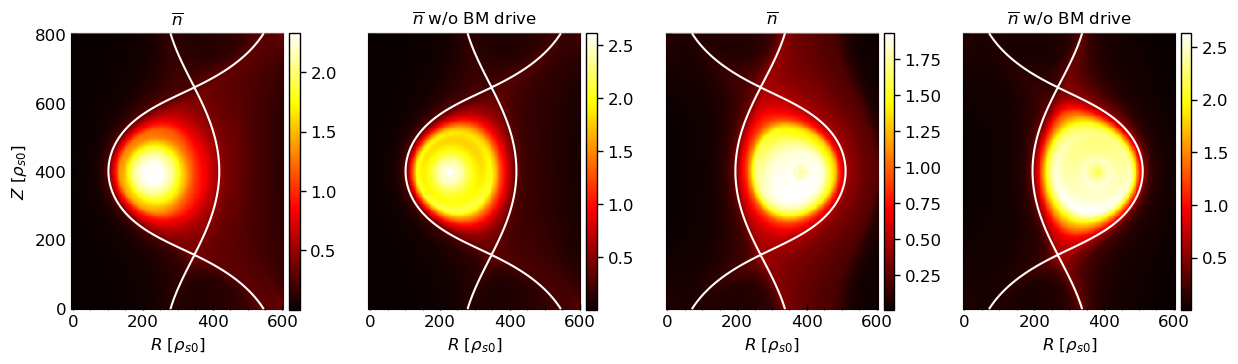

In [54]:
fig, ax = plt.subplots(ncols=4, sharey=True, figsize=(4*fig_width, 1.6*fig_height), dpi=100)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)
X,Y = np.meshgrid(s.x, s.y)

# Colormap list : gist_heat, inferno, viridis, seismic, coolwarm

cs0=ax[0].pcolormesh(X, Y, dens_DNT_avg, cmap='hot', rasterized=True)
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
#cbar0.ax.tick_params(labelsize=3)  # Adjusted size

cs1=ax[1].pcolormesh(X, Y, dens_DNT_avg_no_curv, cmap='hot', rasterized=True)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
#cbar1.ax.tick_params(labelsize=3)  # Adjusted size

cs2=ax[2].pcolormesh(X, Y, dens_DPT_avg, cmap='hot', rasterized=True)
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
#cbar2.ax.tick_params(labelsize=3)  # Adjusted size


cs3=ax[3].pcolormesh(X, Y, dens_DPT_avg_no_curv, cmap='hot', rasterized=True)
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
#cbar3.ax.tick_params(labelsize=3)  # Adjusted size


ax[0].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='w', linestyles='-')
ax[1].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='w', linestyles='-')
ax[2].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='w', linestyles='-')
ax[3].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='w', linestyles='-')

for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(which='minor', direction="in")
    ax[i].tick_params(which='major', direction="in")
    ax[i].tick_params(axis='x')
    ax[i].tick_params(axis='y')
    ax[i].set_xlabel(r'$R\,\,[\rho_{s0}]$')
    for spine in ax[i].spines.values():
        spine.set_linewidth(0.1)

        
ax[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$')
ax[0].set_title(r'$\overline{n}$')
ax[1].set_title(r'$\overline{n}$ w/o BM drive')
ax[2].set_title(r'$\overline{n}$ ')
ax[3].set_title(r'$\overline{n}$ w/o BM drive')

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_mean_no_curv.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)#

Text(0.5, 1.0, '$\\bar{p}_e$ no curv')

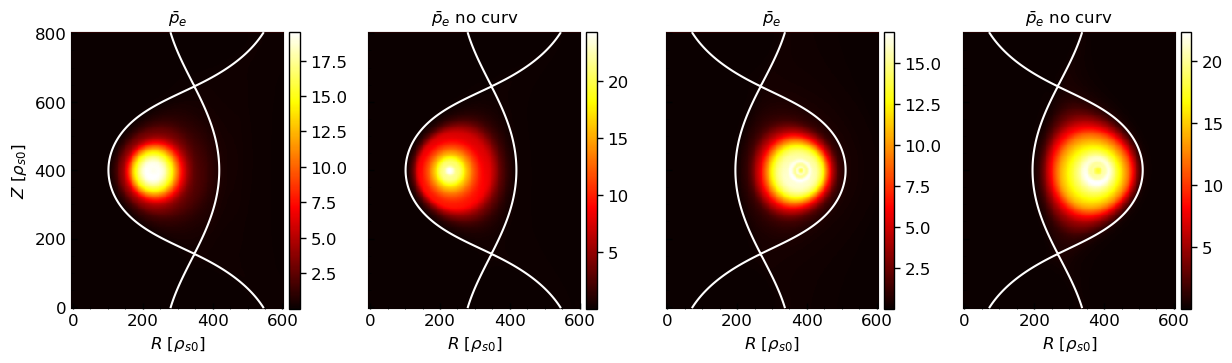

In [50]:
fig, ax = plt.subplots(ncols=4, sharey=True, figsize=(4*fig_width, 1.6*fig_height), dpi=100)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)
X,Y = np.meshgrid(s.x, s.y)

# Colormap list : gist_heat, inferno, viridis, seismic, coolwarm

cs0=ax[0].pcolormesh(X, Y, pe_DNT_avg, cmap='hot')
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
#cbar0.ax.tick_params(labelsize=3)  # Adjusted size

cs1=ax[1].pcolormesh(X, Y, pe_DNT_avg_no_curv, cmap='hot')
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
#cbar1.ax.tick_params(labelsize=3)  # Adjusted size

cs2=ax[2].pcolormesh(X, Y, pe_DPT_avg, cmap='hot')
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
#cbar2.ax.tick_params(labelsize=3)  # Adjusted size


cs3=ax[3].pcolormesh(X, Y, pe_DPT_avg_no_curv, cmap='hot')
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
#cbar3.ax.tick_params(labelsize=3)  # Adjusted size


ax[0].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='w', linestyles='-')
ax[1].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='w', linestyles='-')
ax[2].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='w', linestyles='-')
ax[3].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='w', linestyles='-')

for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(which='minor', direction="in")
    ax[i].tick_params(which='major', direction="in")
    ax[i].tick_params(axis='x')
    ax[i].tick_params(axis='y')
    ax[i].set_xlabel(r'$R\,\,[\rho_{s0}]$')
    for spine in ax[i].spines.values():
        spine.set_linewidth(0.1)

        
ax[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$')
ax[0].set_title(r'$\bar{p}_e$')
ax[1].set_title(r'$\bar{p}_e$ no curv')
ax[2].set_title(r'$\bar{p}_e$')
ax[3].set_title(r'$\bar{p}_e$ no curv')

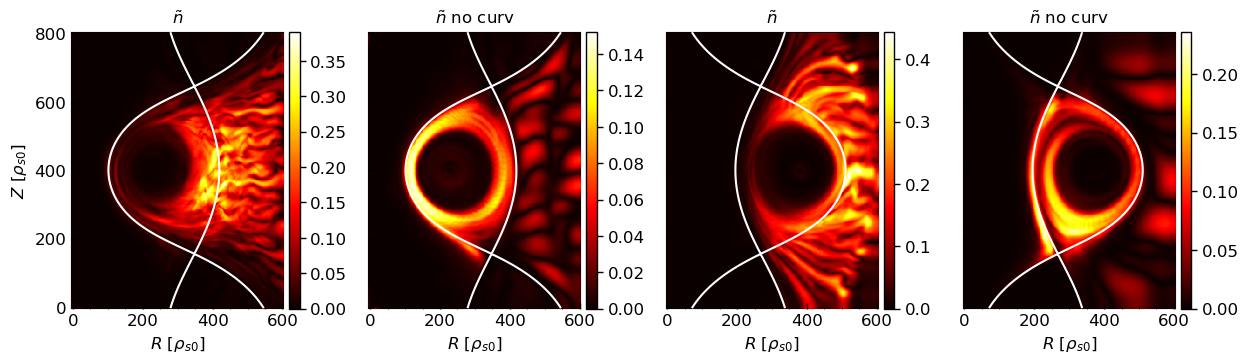

In [56]:
fig, ax = plt.subplots(ncols=4, sharey=True, figsize=(4*fig_width, 1.6*fig_height), dpi=100)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)
X,Y = np.meshgrid(s.x, s.y)

# Colormap list : gist_heat, inferno, viridis, seismic, coolwarm

cs0=ax[0].pcolormesh(X, Y, dens_DNT_fluct_avg, cmap='hot', rasterized=True)
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
#cbar0.ax.tick_params(labelsize=3)  # Adjusted size

cs1=ax[1].pcolormesh(X, Y, dens_DNT_fluct_avg_no_curv, cmap='hot', rasterized=True)
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
#cbar1.ax.tick_params(labelsize=3)  # Adjusted size

cs2=ax[2].pcolormesh(X, Y, dens_DPT_fluct_avg, cmap='hot', rasterized=True)
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
#cbar2.ax.tick_params(labelsize=3)  # Adjusted size


cs3=ax[3].pcolormesh(X, Y, dens_DPT_fluct_avg_no_curv, cmap='hot', rasterized=True)
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
#cbar3.ax.tick_params(labelsize=3)  # Adjusted size


ax[0].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='w', linestyles='-')
ax[1].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='w', linestyles='-')
ax[2].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='w', linestyles='-')
ax[3].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='w', linestyles='-')

for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(which='minor', direction="in")
    ax[i].tick_params(which='major', direction="in")
    ax[i].tick_params(axis='x')
    ax[i].tick_params(axis='y')
    ax[i].set_xlabel(r'$R\,\,[\rho_{s0}]$')
    for spine in ax[i].spines.values():
        spine.set_linewidth(0.1)

        
ax[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$')
ax[0].set_title(r'$\tilde{n}$')
ax[1].set_title(r'$\tilde{n}$ no curv')
ax[2].set_title(r'$\tilde{n}$')
ax[3].set_title(r'$\tilde{n}$ no curv')

# Save the figure
dpi_val = 300
home_directory = os.path.expanduser('~')
os.chdir(home_directory)
#plt.savefig("DN_fluct_no_curv.pdf", bbox_inches='tight', format='pdf', pad_inches=0.01, dpi=dpi_val)#

Text(0.5, 1.0, '$\\tilde{p}$ no curv')

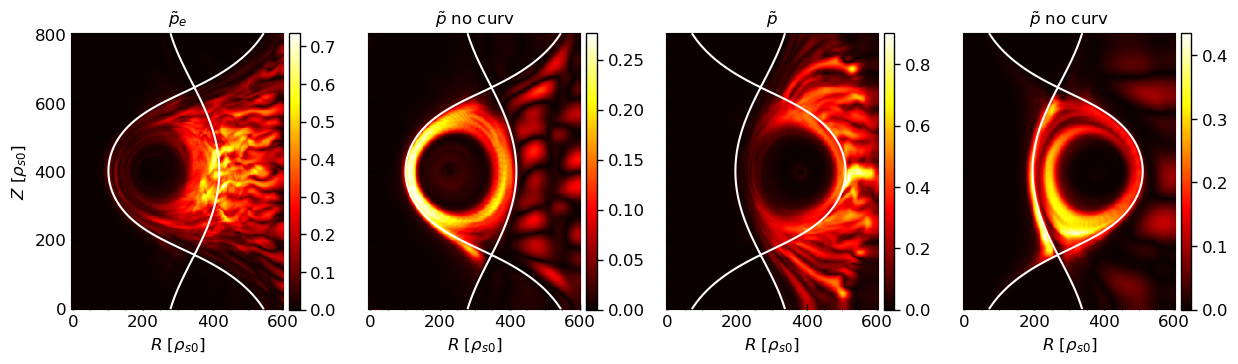

In [52]:
fig, ax = plt.subplots(ncols=4, sharey=True, figsize=(4*fig_width, 1.6*fig_height), dpi=100)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)
X,Y = np.meshgrid(s.x, s.y)

# Colormap list : gist_heat, inferno, viridis, seismic, coolwarm

cs0=ax[0].pcolormesh(X, Y, pe_DNT_fluct_avg, cmap='hot')
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
#cbar0.ax.tick_params(labelsize=3)  # Adjusted size

cs1=ax[1].pcolormesh(X, Y, pe_DNT_fluct_avg_no_curv, cmap='hot')
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
#cbar1.ax.tick_params(labelsize=3)  # Adjusted size

cs2=ax[2].pcolormesh(X, Y, pe_DPT_fluct_avg, cmap='hot')
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
#cbar2.ax.tick_params(labelsize=3)  # Adjusted size

cs3=ax[3].pcolormesh(X, Y, pe_DPT_fluct_avg_no_curv, cmap='hot')
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
#cbar3.ax.tick_params(labelsize=3)  # Adjusted size


ax[0].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='w', linestyles='-')
ax[1].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='w', linestyles='-')
ax[2].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='w', linestyles='-')
ax[3].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='w', linestyles='-')

for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(which='minor', direction="in")
    ax[i].tick_params(which='major', direction="in")
    ax[i].tick_params(axis='x')
    ax[i].tick_params(axis='y')
    ax[i].set_xlabel(r'$R\,\,[\rho_{s0}]$')
    for spine in ax[i].spines.values():
        spine.set_linewidth(0.1)

        
ax[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$')
ax[0].set_title(r'$\tilde{p}_e$')
ax[1].set_title(r'$\tilde{p}$ no curv')
ax[2].set_title(r'$\tilde{p}$')
ax[3].set_title(r'$\tilde{p}$ no curv')

Text(0.5, 1.0, '$\\tilde{p}$ no curv')

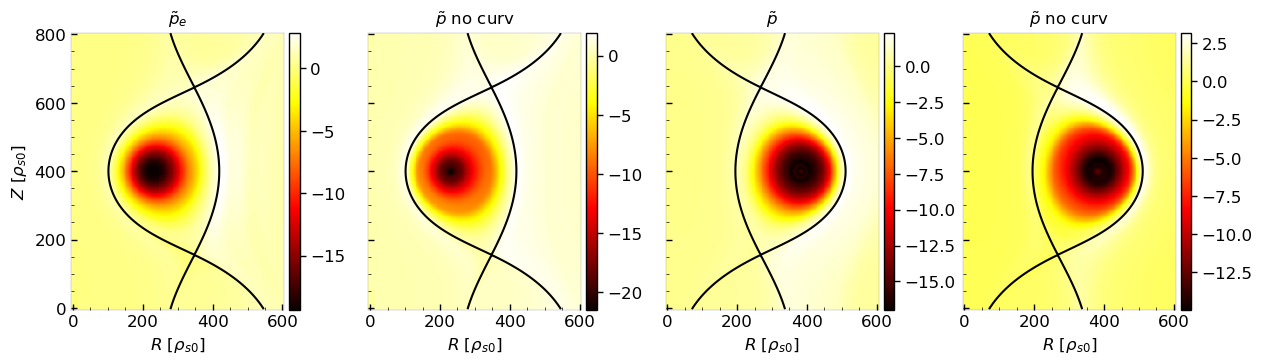

In [53]:
fig, ax = plt.subplots(ncols=4, sharey=True, figsize=(4*fig_width, 1.6*fig_height), dpi=100)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)
X,Y = np.meshgrid(s.x, s.y)

# Colormap list : gist_heat, inferno, viridis, seismic, coolwarm

cs0=ax[0].pcolormesh(X, Y, phi_DNT_avg, cmap='hot')
divider = make_axes_locatable(ax[0])
cax0 = divider.append_axes('right', size='5%', pad=0.05)
cbar0 = fig.colorbar(cs0, cax=cax0, orientation='vertical')
#cbar0.ax.tick_params(labelsize=3)  # Adjusted size

cs1=ax[1].pcolormesh(X, Y, phi_DNT_avg_no_curv, cmap='hot')
divider = make_axes_locatable(ax[1])
cax1 = divider.append_axes('right', size='5%', pad=0.05)
cbar1 = fig.colorbar(cs1, cax=cax1, orientation='vertical')
#cbar1.ax.tick_params(labelsize=3)  # Adjusted size

cs2=ax[2].pcolormesh(X, Y, phi_DPT_avg, cmap='hot')
divider = make_axes_locatable(ax[2])
cax2 = divider.append_axes('right', size='5%', pad=0.05)
cbar2 = fig.colorbar(cs2, cax=cax2, orientation='vertical')
#cbar2.ax.tick_params(labelsize=3)  # Adjusted size

cs3=ax[3].pcolormesh(X, Y, phi_DPT_avg_no_curv, cmap='hot')
divider = make_axes_locatable(ax[3])
cax3 = divider.append_axes('right', size='5%', pad=0.05)
cbar3 = fig.colorbar(cs3, cax=cax3, orientation='vertical')
#cbar3.ax.tick_params(labelsize=3)  # Adjusted size


ax[0].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k', linestyles='-')
ax[1].contour(X, Y, Psi_DNT, levels=[Psi_DNT[iyxpt_DNT, ixxpt_DNT]], colors='k', linestyles='-')
ax[2].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k', linestyles='-')
ax[3].contour(X, Y, Psi_DPT, levels=[Psi_DPT[iyxpt_DPT, ixxpt_DPT]], colors='k', linestyles='-')

for i in range(4):
    ax[i].xaxis.set_minor_locator(AutoMinorLocator())
    ax[i].yaxis.set_minor_locator(AutoMinorLocator())
    ax[i].tick_params(which='minor', direction="in")
    ax[i].tick_params(which='major', direction="in")
    ax[i].tick_params(axis='x')
    ax[i].tick_params(axis='y')
    ax[i].set_xlabel(r'$R\,\,[\rho_{s0}]$')
    for spine in ax[i].spines.values():
        spine.set_linewidth(0.1)

        
ax[0].set_ylabel(r'$Z\,\,[\rho_{s0}]$')
ax[0].set_title(r'$\tilde{p}_e$')
ax[1].set_title(r'$\tilde{p}$ no curv')
ax[2].set_title(r'$\tilde{p}$')
ax[3].set_title(r'$\tilde{p}$ no curv')